In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
n=100000
Sociedad=np.arange(n, dtype=float)
Fiscalia = np.arange(n, dtype=float)
sigma = 0.1
d = 3
p = 0.7
beta  = 5
Gobierno=np.arange(-1,1,0.01)
Inteligencia = np.arange(0.0001,100,0.1)

def gauss(x, sigma):
    campanita= np.exp(-x**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
    return campanita

def invExp(y,o):
    colita = (1/y**2)*np.exp(-o/y)
    return colita

oportunidades=gauss(Gobierno,sigma)
aceptacionSocial = invExp(Inteligencia,p)

In [49]:
Sociedad[0] = 0.5
Fiscalia[0] = 0.5


counter1=0
counter2=0
for i in range(1,n,1):
    candidato = Sociedad[i-1]+2*d*(np.random.uniform()-0.5)
    candidato2 = Fiscalia[i-1]+2*d*(np.random.uniform()-0.5)
    F = gauss(candidato,sigma)/gauss(Sociedad[i-1],sigma)
    if candidato2 > 0:
        G = invExp(candidato2,p)/invExp(Fiscalia[i-1],p)
        if G>=1:
        ## Aceptado en la sociedad
            Fiscalia[i]= candidato2
            counter2 = counter2+1
        else:
            if np.random.uniform()<G:
                ##Aceptado en la soceidad
                Fiscalia[i] = candidato2
                counter2 =counter2+1
            else:
                Fiscalia[i] =Fiscalia[i-1]
    else:
        Fiscalia[i] =Fiscalia[i-1]
    if F>=1:
        ## Aceptado en la sociedad
        Sociedad[i]= candidato
        counter1 =counter1+1
    else:
        if np.random.uniform()<F:
            ##Aceptado en la soceidad
            Sociedad[i] = candidato
            counter1 =counter1+1
        else:
            Sociedad[i] =Sociedad[i-1]
            

Acceptance Ratio 43.980000000000004 %


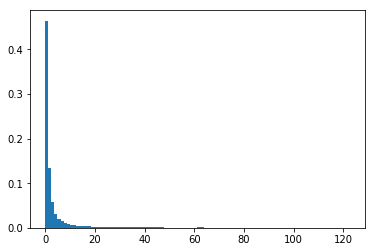

In [51]:
plt.hist(Fiscalia,bins=100,density=True)
yoyo2 = counter2/n*100
print("Acceptance Ratio " + str(yoyo2) + " %")
#plt.plot(Inteligencia,aceptacionSocial)

Acceptance Ratio 5.356000000000001 %


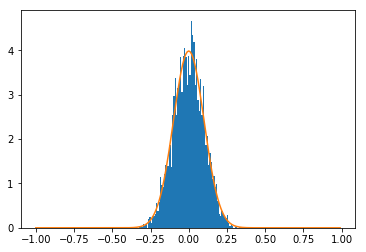

In [47]:
plt.hist(Sociedad,bins=100,density=True)
yoyo = counter1/n*100
print("Acceptance Ratio " + str(yoyo)+ " %")
plt.plot(Gobierno,oportunidades)

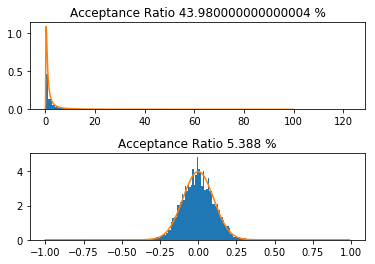

In [55]:
yoyo2 = counter2/n*100
yoyo = counter1/n*100

plt.figure(1)
plt.subplot(211)
plt.hist(Fiscalia,bins=100,density=True)
plt.title("Acceptance Ratio " + str(yoyo2) + " %")
plt.plot(Inteligencia,aceptacionSocial)

plt.subplot(212)
plt.hist(Sociedad,bins=100,density=True)
plt.title("Acceptance Ratio " + str(yoyo)+ " %")
plt.plot(Gobierno,oportunidades)
plt.subplots_adjust(hspace=0.5)
plt.savefig('pdfs.pdf')